In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_timesteps = 100
num_velocities = 9
ci = np.array([[0, 1, 0, -1, 0, 1, -1, -1, 1], 
               [0, 0, 1, 0, -1, 1, 1, -1, -1]])

In [3]:
fi_exact = np.load("fi_exact_x.npy")
fi_2ndcarleman = np.load("fi_2nd carleman_x.npy")

In [4]:
fe1, fe2, fe3 = fi_exact[0], fi_exact[1], fi_exact[2]
fc1, fc2, fc3 = fi_2ndcarleman[0], fi_2ndcarleman[1], fi_2ndcarleman[2]

In [5]:
def get_macro_quantities(fi):
    rho = np.sum(fi, axis=2)  # Density
    ux = np.sum(fi * ci[0], 2) / rho
    uy = np.sum(fi * ci[1], 2) / rho
    
    return rho, ux, uy

In [6]:
def rmse(a, b):
    rmse = np.sqrt(np.mean(((a - b))**2))
    return rmse

def mae(a, b):
    mae = np.mean(np.abs(a - b))
    return mae

In [7]:
mae1s, mae2s, mae3s = [], [], []

for t in range(num_timesteps):
    # Compute macro velocity
    _, uxe1t, uye1t = get_macro_quantities(fe1[t])
    _, uxe2t, uye2t = get_macro_quantities(fe2[t])
    _, uxe3t, uye3t = get_macro_quantities(fe3[t])
    
    _, uxc1t, uyc1t = get_macro_quantities(fc1[t])
    _, uxc2t, uyc2t = get_macro_quantities(fc2[t])
    _, uxc3t, uyc3t = get_macro_quantities(fc3[t])
    
    # Error data calculation
    mae1 = mae(uxe1t, uxc1t)
    mae2 = mae(uxe2t, uxc2t)
    mae3 = mae(uxe3t, uxc3t)
    
    # Error data storagement
    mae1s.append(mae1)
    mae2s.append(mae2)
    mae3s.append(mae3)

In [8]:
rmse1s, rmse2s, rmse3s = [], [], []

for t in range(num_timesteps):
    rmse1 = rmse(fe1[t, :, :, :], fc1[t, :, :, :])
    rmse2 = rmse(fe2[t, :, :, :], fc2[t, :, :, :])
    rmse3 = rmse(fe3[t, :, :, :], fc3[t, :, :, :])
        
    rmse1s.append(rmse1)
    rmse2s.append(rmse2)
    rmse3s.append(rmse3)

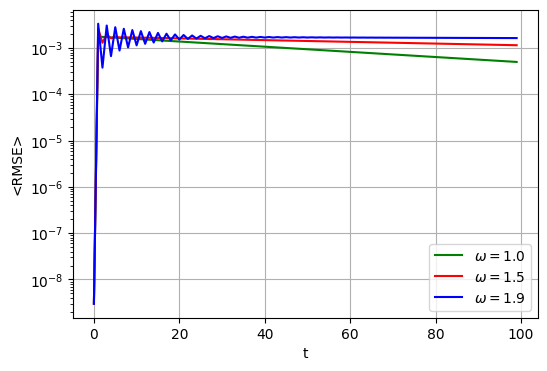

In [9]:
t = np.arange(num_timesteps)

plt.figure(figsize=(6, 4))
plt.plot(t, rmse1s, label="$\\omega = 1.0$", color="green")
plt.plot(t, rmse2s, label="$\\omega = 1.5$", color="red")
plt.plot(t, rmse3s, label="$\\omega = 1.9$", color="blue")
plt.yscale('log')
plt.xlabel("t")
plt.ylabel("<RMSE>")
plt.legend()
plt.grid(True)
plt.savefig("RMSE_kolmogorov_x.pdf", format='pdf')  # Vector export
plt.show()

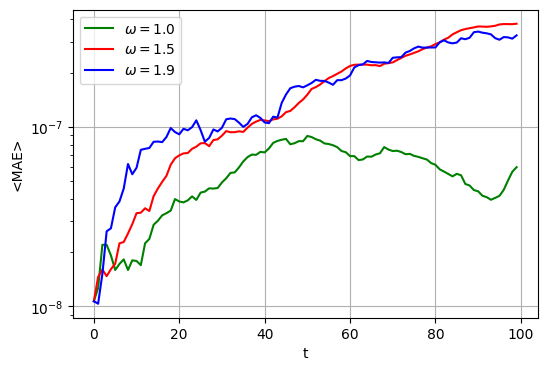

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(t, mae1s, label="$\\omega = 1.0$", color="green")
plt.plot(t, mae2s, label="$\\omega = 1.5$", color="red")
plt.plot(t, mae3s, label="$\\omega = 1.9$", color="blue")
plt.yscale('log')
plt.xlabel("t")
plt.ylabel("<MAE>")
plt.legend()
plt.grid(True)
plt.savefig("MAE_kolmogorov_x.pdf", format='pdf')  # Vector export
plt.show()